# E-Commerce Shipping Dataset : Data Pre-Processing

### Product Shipment Delivered on time or not ; To Meet E-Commerce Customer Demand


The data contains the following information:  
1. **ID** : ID Number of Customers.
2. **Warehouse block** : The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. **Mode of shipment** :The Company Ships the products in multiple way such as Ship, Flight and Road.
4. **Customer care calls** : The number of calls made from enquiry for enquiry of the shipment.
5. **Customer rating** : The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. **Cost of the product** : Cost of the Product in US Dollars.
7. **Prior purchases** : The Number of Prior Purchase.
8. **Product importance** : The company has categorized the product in the various parameter such as low, medium, high.
9. **Gender** : Male and Female.
10. **Discount offered** : Discount offered on that specific product. 
11. **Weight in gms** : It is the weight in grams.
12. **Reached on time** : It is the target variable, where 1 Indicates that the
product has NOT reached on time and 0 indicates it has reached on time.


# Data Pre-processing

## Load & Describe Data

### Import library

In [ ]:
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # use style fivethirtyeight
import seaborn as sns
from matplotlib import rcParams
import warnings 
warnings.filterwarnings("ignore")
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Selection
from scipy.stats import chi2_contingency
# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Import file

In [ ]:
df = pd.read_csv('/content/Train .csv')

### Rename column target

In [ ]:
df.rename(columns={'Reached.on.Time_Y.N':'is_late'}, inplace=True)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,is_late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Because of the target's name is too long, so we simplify the name to ease the next step.

### Get the shape of dataset

In [ ]:
df.shape

(10999, 12)

### Get list of columns

In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'is_late'],
      dtype='object')

### Change all column names to lower case

In [ ]:
df.columns = df.columns.str.lower()

### Get dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  is_late              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Based on the information above :**
1. Dataframe has 10999 rows and 12 columns.
2. No missing values are found.
3. There are only 2 data types, integer and object.
4. Classification target `is_late` and others we call features.

### Separate numeric & categorical column

In [ ]:
# Categorical data
categorical = ['warehouse_block','mode_of_shipment','product_importance', 'gender', 'is_late', 'customer_rating']
# Numerical data
numeric = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms']

## Data Cleansing & Feature Engineering

#### Reload dataset

In [ ]:
df_dt = df.copy()

#### Identify missing values

In [ ]:
df_dt.isna().values.any() # Missing value detection

False

In [ ]:
df_dt.isna().sum()  # Calculate missing values

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
is_late                0
dtype: int64

Just for making sure that no missing values are found.

#### Identify duplicated values

In [ ]:
# Select all duplicate rows based on all columns
df_dt[df_dt.duplicated(keep=False)] 

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,is_late


In [ ]:
# Select all duplicate rows based on selected column
df_dt[df_dt.duplicated(subset=['id'],keep=False)] # Display all duplicated rows based on column 'id'

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,is_late


Luckily, there is no duplicated value in the dataframe.

#### Identify outliers

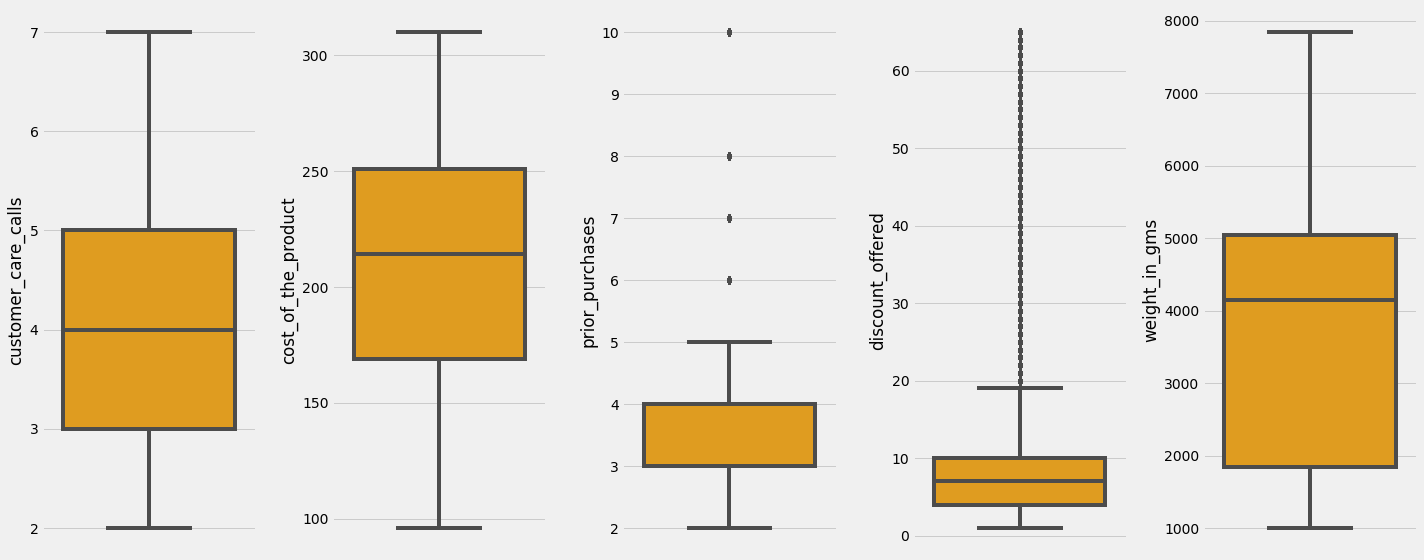

In [ ]:
# Identify using boxplot
plt.figure(figsize=(20,8))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y=df_dt[numeric[i]], color='orange')
    plt.tight_layout()

In [ ]:
# Identify outlier using IQR
for col in numeric:
    
    # Menghitung nilai IQR
    Q1 = df_dt[col].quantile(0.25)
    Q3 = df_dt[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define value 
    nilai_min = df_dt[col].min()
    nilai_max = df_dt[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)
    
    # Identify low outlier

    if (nilai_min < lower_lim):
        print('Low outlier is found in column',col,'<', lower_lim,'\n')
        #display total low outlier 
        print('Total of Low Outlier in column',col, ':', len(list(df_dt[df_dt[col] < lower_lim].index)),'\n')
    elif (nilai_max > upper_lim):
        print('High outlier is found in column',col,'>', upper_lim,'\n')
        #display total high outlier 
        print('Total of High Outlier in column',col, ':', len(list(df_dt[df_dt[col] > upper_lim].index)),'\n')
        
    else:
        print('Outlier is not found in column',col,'\n')
        

Outlier is not found in column customer_care_calls 

Outlier is not found in column cost_of_the_product 

High outlier is found in column prior_purchases > 5.5 

Total of High Outlier in column prior_purchases : 1003 

High outlier is found in column discount_offered > 19.0 

Total of High Outlier in column discount_offered : 2209 

Outlier is not found in column weight_in_gms 



We found outliers in `discount_offered` & `prior_purchases` with almost 30% of data.

In [ ]:
# We handle outlier with replace the value with upper_bound or lower_bound 
for col in ['prior_purchases', 'discount_offered']:
    # Initiate Q1
    Q1 = df_dt[col].quantile(0.25)
    # Initiate Q3
    Q3 = df_dt[col].quantile(0.75)
    # Initiate IQR
    IQR = Q3 - Q1
    # Initiate lower_bound & upper_bound 
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    # Filtering outlier & replace with upper_bound or lower_bound 
    df_dt[col] = np.where(df_dt[col] >= upper_bound,
                         upper_bound, df_dt[col])
    df_dt[col] = np.where(df_dt[col] <= lower_bound,
                         lower_bound, df_dt[col])

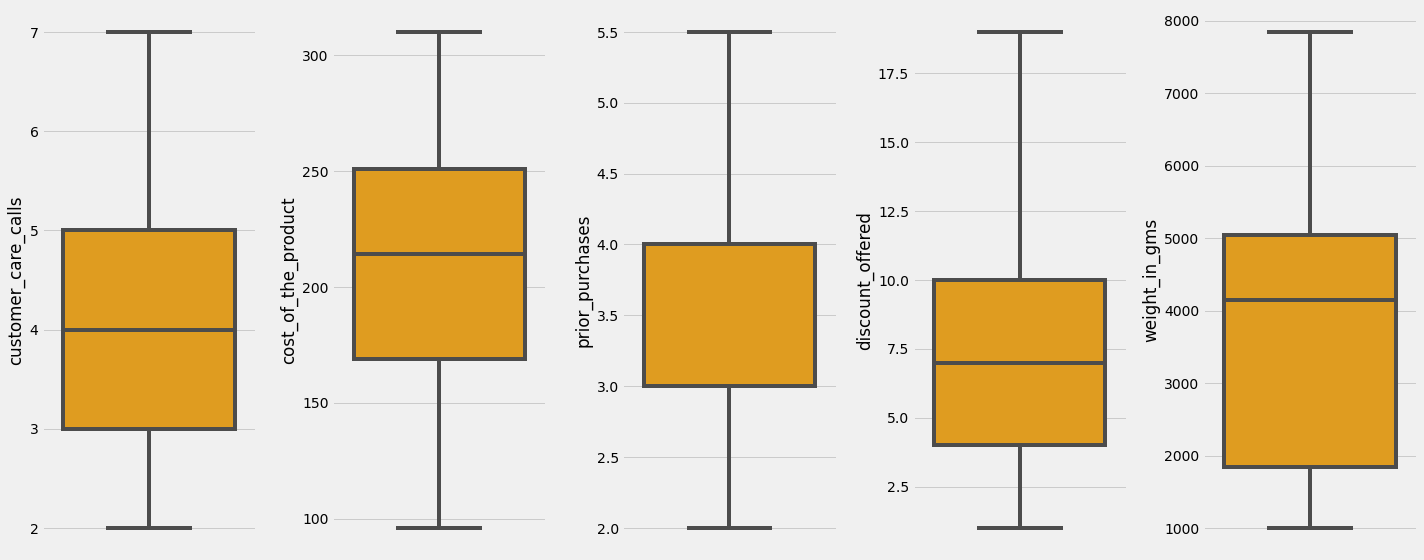

In [ ]:
# Identify using boxplot
plt.figure(figsize=(20,8))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y=df_dt[numeric[i]], color='orange')
    plt.tight_layout()

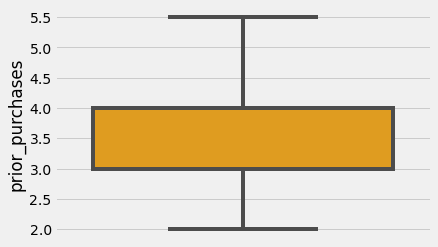

In [ ]:
sns.boxplot(y= df_dt['prior_purchases'], color = 'orange', orient = 'h');


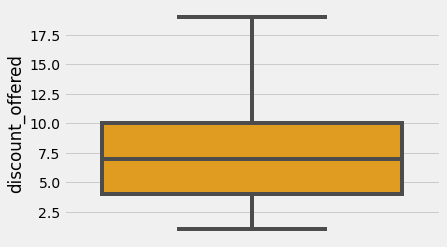

In [ ]:
sns.boxplot(y= df_dt['discount_offered'], color = 'orange', orient = 'h');

We didn't remove the outliers, but replacing with upper bound and lower bound. And we can see in the visualization above, there is no outliers detected.

#### Feature Transformation : Log transform

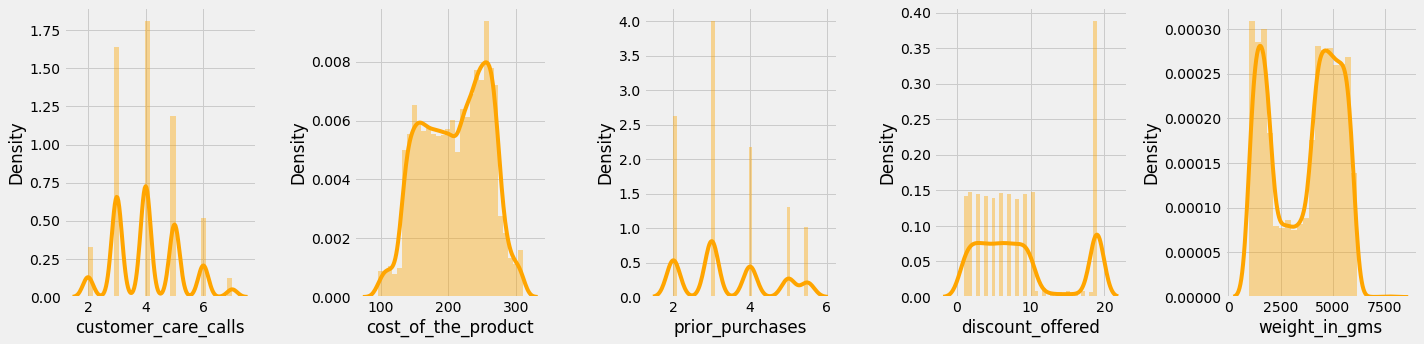

In [ ]:
# Check data distribution
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_dt[numeric[i]], color='orange')
    plt.tight_layout()

In [ ]:
# Apply log transformation
for col in numeric:
    df_dt[col] = (df_dt[col]+1).apply(np.log)

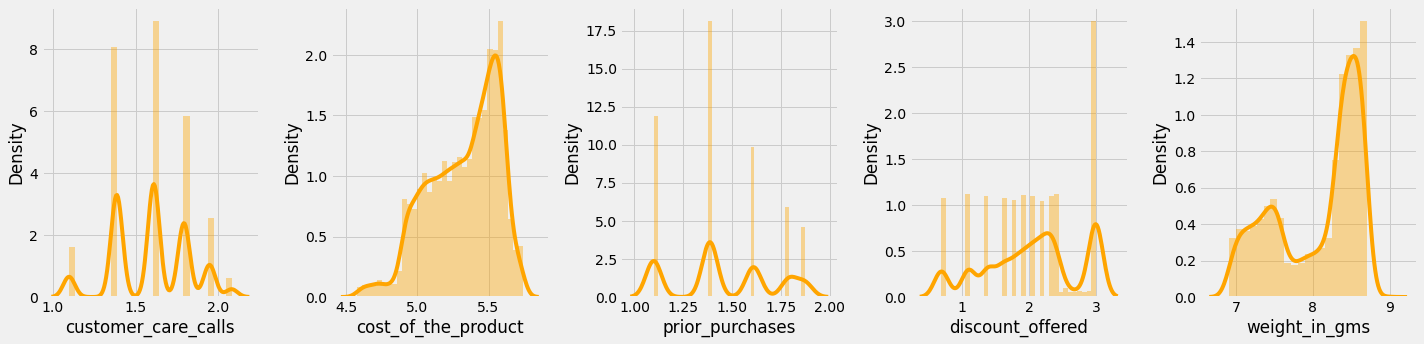

In [ ]:
# Visualize after log transformation
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_dt[numeric[i]], color='orange')
    plt.tight_layout()

#### Feature Scaling : Standardization

In [ ]:
# Apply standardization
for col in numeric:
    df_dt[col]= StandardScaler().fit_transform(df_dt[col].values.reshape(len(df_dt), 1))

In [ ]:
df_dt.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,is_late
count,10999.00000,1.099900e+04,10999.000000,1.099900e+04,1.099900e+04,10999.000000,1.099900e+04,10999.000000
mean,5500.00000,1.550416e-16,2.990545,-5.100869e-15,-1.447055e-16,0.000000,5.788220e-16,0.596691
std,3175.28214,1.000045e+00,1.413603,1.000045e+00,1.000045e+00,1.000045,1.000045e+00,0.490584
min,1.00000,-2.177630e+00,1.000000,-3.086779e+00,-1.387728e+00,-1.947658,-2.073431e+00,0.000000
25%,2750.50000,-9.146463e-01,2.000000,-7.773403e-01,-2.636003e-01,-0.623429,-9.814039e-01,0.000000
50%,5500.00000,6.500001e-02,3.000000,1.892606e-01,-2.636003e-01,0.055824,4.788573e-01,1.000000
75%,8249.50000,8.654293e-01,4.000000,8.428454e-01,6.083412e-01,0.516055,8.317281e-01,1.000000
max,10999.00000,2.128413e+00,5.000000,1.708704e+00,1.633539e+00,1.380053,1.622939e+00,1.000000


#### Feature Selection : Chi squared method

In [ ]:

# Selection for categorial feature
# Import module
from scipy.stats import chi2_contingency

category = ['warehouse_block','mode_of_shipment','product_importance', 
            'gender','customer_rating']
chi2_check = []
# Iteration
for col in category:
    # If pvalue < 0.05 
    if chi2_contingency(pd.crosstab(df_dt['is_late'], df_dt[col]))[1] < 0.05 :
        chi2_check.append('Reject Null Hypothesis')
    # If pvalue > 0.05
    else :
        chi2_check.append('Fail to Reject Null Hypothesis')
        
# Make the result into dataframe
res = pd.DataFrame(data = [category, chi2_check]).T
# Rename columns
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,warehouse_block,Fail to Reject Null Hypothesis
1,mode_of_shipment,Fail to Reject Null Hypothesis
2,product_importance,Reject Null Hypothesis
3,gender,Fail to Reject Null Hypothesis
4,customer_rating,Fail to Reject Null Hypothesis


In [ ]:
# Adjusted P-Value use the Bonferroni-adjusted method

# Initiate empty dictionary
check = {}
# Iteration for product_importance column
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    # One hot encoding product_importance column
    dummies = pd.get_dummies(df_dt[i])
    # Initiate Bonferroni-adjusted formula
    bon_p_value = 0.05/df_dt[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df_dt['is_late'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else :
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
# Make the result into dataframe
res_chi_ph = pd.DataFrame(data=[check.keys(), check.values()]).T
# Rename the columns
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,product_importance-high,Reject Null Hypothesis
1,product_importance-low,Fail to Reject Null Hypothesis
2,product_importance-medium,Fail to Reject Null Hypothesis


From the result above, `product_importance` with **high** category has a correlation with our target.

#### Feature Encoding : One hot encoding

In [ ]:
# one hot encoding feature product_importance and keep high category
onehots = pd.get_dummies(df_dt['product_importance'], prefix = 'product_importance')
df_dt = df_dt.join(onehots)

# drop all categorical columns & 'id, except product_importance_high
df_dt.drop(columns=['warehouse_block','gender','mode_of_shipment',
                   'product_importance', 'product_importance_low',
                   'product_importance_medium','id'], inplace = True)
# check dataframe after encoding
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_care_calls      10999 non-null  float64
 1   customer_rating          10999 non-null  int64  
 2   cost_of_the_product      10999 non-null  float64
 3   prior_purchases          10999 non-null  float64
 4   discount_offered         10999 non-null  float64
 5   weight_in_gms            10999 non-null  float64
 6   is_late                  10999 non-null  int64  
 7   product_importance_high  10999 non-null  uint8  
dtypes: float64(5), int64(2), uint8(1)
memory usage: 612.4 KB


## Exploratory Data Analysis (EDA)

In [ ]:
# Copy dataset
df_eda = df.copy()

### Target Visualization

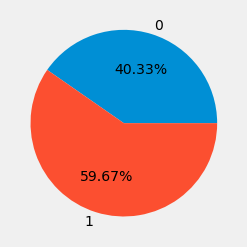

In [ ]:
delay = pd.DataFrame(df_eda.groupby(['is_late'])['id'].count()/len(df_eda)).reset_index()
plt.pie(delay['id'],labels=delay['is_late'],autopct='%.2f%%');

The class of target looks balance.

### Descriptive Statistic

#### Categorical values

In [ ]:
# for categorical column
for col in categorical:
    print('Value count kolom', col, ':')
    print(df_eda[col].value_counts())
    print()

Value count kolom warehouse_block :
F    3666
D    1834
A    1833
B    1833
C    1833
Name: warehouse_block, dtype: int64

Value count kolom mode_of_shipment :
Ship      7462
Flight    1777
Road      1760
Name: mode_of_shipment, dtype: int64

Value count kolom product_importance :
low       5297
medium    4754
high       948
Name: product_importance, dtype: int64

Value count kolom gender :
F    5545
M    5454
Name: gender, dtype: int64

Value count kolom is_late :
1    6563
0    4436
Name: is_late, dtype: int64

Value count kolom customer_rating :
3    2239
1    2235
4    2189
5    2171
2    2165
Name: customer_rating, dtype: int64



ValueError: ignored

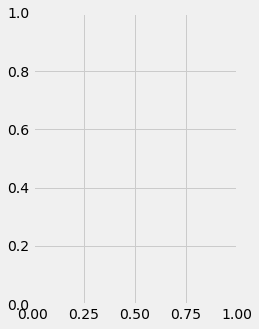

In [ ]:
# Plot categorical columns
for col in categorical:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(141);
    sns.countplot(df_eda[col], palette = 'colorblind', orient='v');
    plt.title('Countplot')
    plt.tight_layout();
    
    
    plt.subplot(143);
    df_eda[col].value_counts().plot.pie(autopct='%1.2f%%');
    plt.title('Pie chart')
    plt.legend()  

**Summary :**
- **Warehouse_Block** has 5 unique values and dominated with `Warehouse_block_f`.
- **Mode_of_Shipment** has 3 unique values and mostly used ship.
- **Product_importance** has 3 unique values and mostly priority of products are low.
- Female customers are often shopping than male.





#### Numeric values

In [ ]:
df_eda[numeric].describe()

**Summary :**
- Distribution of **customer_care_calls**, **Customer_rating**, **Cost_of_the_Product**, **Prior_purchases** look normal, beacuse the mean and the median are close, while  **discount_offered** and **weight_in_grams** are indicated skewed.




#### Correlation Heatmap

In [ ]:
plt.figure(figsize=(7,6));
sns.heatmap(df_eda.corr(), annot = True, fmt = '.2f', cmap = 'Reds');

Based on the *Correlation heatmap* above :  
1. Target *is_late* has a moderate positive correlation with *discount_offered* & weak negative correlation with *weight_in_gms*.
2. Feature *customer_care_calss* has a weak positive correlation with *cost_of_the_product* and negative correlation with *weight_in_gms*.
3. Feature *discount_offered* has a moderate negative correlation with *weight_in_gms*.


#### Pairplot

In [ ]:
plt.figure(figsize=(5, 5));
p = sns.pairplot(df_eda, markers = '+', diag_kind = 'kde', hue = 'is_late');
# title
new_title = 'Shipment ?'
p._legend.set_title(new_title);

# replace labels
new_labels = ['on_time', 'late']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l);

**Summary :**
- The shipment tends to deliver on time when the discount under 10% and weight is 1 - 2 Kg & 4 - 6 Kg.
- Most of products that cost around $300 delivered on time, others late.
- Majority customers who get the late parcels are more likely to call customer care, no matter how often they called.

#### Categorical - Categorical

##### Based on Gender

In [ ]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block', 'product_importance']:
    plt.subplot(2,2,i)
    sns.countplot(df_eda[col], hue=df_eda['gender'], palette="ch:.25")
    i+=1

**Summary :**  
- Total parcels of female customers in the warehouse_block are more dominant than male customers, except in warehouse_block B.

##### Based on Product Importance

In [ ]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block']:
    plt.subplot(2,2,i)
    sns.countplot(df_eda[col], hue=df_eda['product_importance'], palette="ch:.25")
    i+=1

**Summary :**  
- Mostly high & low priority parcels used ship.



##### Warehouse block - Mode of Shipment

In [ ]:
sns.catplot(x="warehouse_block", kind="count", hue='mode_of_shipment',
            palette="ch:.25", data=df_eda);

##### Based on target 'is_late'

In [ ]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block', 'product_importance',
            'gender','customer_rating']:
    plt.subplot(2,3,i)
    sns.countplot(df_eda[col], hue=df_eda['is_late'], palette="ch:.25")
    i+=1
    plt.legend(['on_time','late']);

**Summary :**  
- Most of parcels are stored in warehouse_block F.
- The ship contributes the most late delivery.
- Most of parcels in all shipment priority are delivered late.

# Machine Learning Modelling & Evaluation

### Separate feature & target column

In [ ]:
# Inititate feature & target
X = df_dt.drop(columns = 'is_late')
y = df_dt['is_late']

### Split train & test data

In [ ]:
# Split Train & Test Data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

### Fit & Evaluation Model

In [ ]:
# Create function to fit model & model evaluation
def fit_evaluation(Model, Xtrain, ytrain, Xtest, ytest):
    model = Model # initiate model
    model.fit(Xtrain, ytrain) # fit the model
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    train_score = model.score(Xtrain, ytrain) # Train Accuracy
    test_score = model.score(Xtest, ytest)    # Test Accuracy
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr) # AUC
    return round(train_score,2), round(test_score,2), round(precision_score(ytest, y_pred),2), \
           round(recall_score(ytrain, y_pred_train),2),round(recall_score(ytest, y_pred),2), \
           round(f1_score(ytest, y_pred),2), round(AUC,2)

#### Default Parameter

In [ ]:
# Inititate algorithm
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric = 'logloss')

# Create function to make the result as dataframe 
def model_comparison_default(X,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr, Xtrain, ytrain, Xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt, Xtrain, ytrain, Xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf, Xtrain, ytrain, Xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn, Xtrain, ytrain, Xtest, ytest)
    # SVC
    svc_train_score, svc_test_score, svc_pr, svctr_re, svcte_re, svc_f1, svc_auc = fit_evaluation(
        svc, Xtrain, ytrain, Xtest, ytest)
    # XGBoost
    xgb_train_score, xgb_test_score, xgb_pr, xgbtr_re, xgbte_re, xgb_f1, xgb_auc = fit_evaluation(
        xgb, Xtrain, ytrain, Xtest, ytest)
    
    
    models = ['Logistic Regression','Decision Tree','Random Forest',
             'KNN','SVC','XGBoost']
    train_score = [lr_train_score, dt_train_score, rf_train_score, 
                   knn_train_score, svc_train_score, xgb_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score,
                  knn_test_score, svc_test_score, xgb_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr, svc_pr, xgb_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re, svctr_re, xgbtr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re, svcte_re, xgbte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc, svc_auc, xgb_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    
    return model_comparison

In [ ]:
model_comparison_default(X,y)

From the result above, only **Logistic Regression and SVC which are neither overfitting nor underfiting**. Logistic Regression has the highest recall. Let's see with tuned parameter.

### Hyperparameter

#### Logistic Regression

In [ ]:
# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42,  scoring='recall')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
model.best_estimator_

#### Decision Tree

In [ ]:
# Let's do hyperparameter tuning using RandomizesearchCV

# Hyperparameter lists to be tested
max_depth = list(range(1,10)) 
min_samples_split = list(range(5,10)) 
min_samples_leaf = list(range(5,15)) 
max_features = ['auto', 'sqrt', 'log2'] 
criterion = ['gini','entropy']
splitter = ['best','random']

# Initiate hyperparameters
hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter)

# Initiate model
dt_tun = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt_tun, hyperparameters, cv=10, scoring='recall',random_state=42) 
model.fit(Xtrain, ytrain)
y_pred_tun = model.predict(Xtest)
model.best_estimator_

#### Random Forest

In [ ]:
# Initiate hyperparameters
params = {'max_depth':[50],'n_estimators':[100,150], 
          'criterion':['gini', 'entropy']}
# Initiate model
model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                     param_grid=params,scoring='recall', cv=5)
# Fit model
model.fit(Xtrain,ytrain)
y_pred = model.predict(Xtest)
# Get best estimator
model.best_estimator_

#### KNN

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
KNN_2 = KNeighborsClassifier()

#Use RandomizedSearchCV
clf = RandomizedSearchCV(KNN_2, hyperparameters, cv=10, scoring = 'recall')

#Fit the model
best_model = clf.fit(X,y)
# Get best estimator
clf.best_estimator_

#### SVC

In [ ]:
# Hyperparameter lists to be tested
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.0001, 0.001, 0.002] 
gamma = ['scale', 'auto']

#Convert to dictionary
hyperparameters = dict(kernel=kernel, C=C, gamma=gamma)

# Initiate model
svc = SVC(random_state=42) 
model = RandomizedSearchCV(svc, hyperparameters, cv=5, random_state=42, 
                           scoring='recall')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
model.best_estimator_

#### XG Boost

In [ ]:
# Hyper Parameter Optimization

hyperparameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}
# Initiate model
xg = XGBClassifier(random_state=42,eval_metric = 'logloss')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
y_pred = xg_tuned.predict(Xtest)#Check performa dari model
xg_tuned.best_estimator_

#### Tuned Parameter

In [ ]:
# Inititate best estimator
lr_tune = LogisticRegression(C=0.0001, random_state=42)
dt_tune = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=6,
                       random_state=42)
rf_tune = RandomForestClassifier(max_depth=50, random_state=42)
knn_tune = KNeighborsClassifier(leaf_size=24, n_neighbors=3, p=1)
#KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     #metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     #weights='uniform')
svc_tune = SVC(C=0.0001, kernel='linear', random_state=42)
xgb_tune = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='logloss',
              gamma=0.4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

# Create function to make the result as dataframe 
def model_comparison_tuned(X,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr_tune, Xtrain, ytrain, Xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt_tune, Xtrain, ytrain, Xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf_tune, Xtrain, ytrain, Xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn_tune, Xtrain, ytrain, Xtest, ytest)
    # SVC
    svc_train_score, svc_test_score, svc_pr, svctr_re, svcte_re, svc_f1, svc_auc = fit_evaluation(
        svc_tune, Xtrain, ytrain, Xtest, ytest)
    # XGBoost
    xgb_train_score, xgb_test_score, xgb_pr, xgbtr_re, xgbte_re, xgb_f1, xgb_auc = fit_evaluation(
        xgb_tune, Xtrain, ytrain, Xtest, ytest)
    
    
    models = ['Logistic Regression','Decision Tree','Random Forest',
             'KNN','SVC','XGBoost']
    train_score = [lr_train_score, dt_train_score, rf_train_score, 
                   knn_train_score, svc_train_score, xgb_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score,
                  knn_test_score, svc_test_score, xgb_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr, svc_pr, xgb_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re, svctr_re, xgbtr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re, svcte_re, xgbte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc, svc_auc, xgb_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    
    return model_comparison

In [ ]:
model_comparison_tuned(X,y)

Decision Tree algorithm with hyper-parameter tuning has a good balance between its score, also neither underfitting nor overfitting.

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def get_confusion_matrix(model, X_train, y_train, X_test, y_test, labels=None):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Set display labels
    if labels is None:
        labels = ['Negative', 'Positive']
    
    # Plot the confusion matrix using Seaborn heatmap
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
# After hyperparameter tuning
get_confusion_matrix(dt_tune, Xtrain, ytrain, Xtest, ytest,labels=['on_time','late'])

In [ ]:
# Before hyperparameter tuning
get_confusion_matrix(dt, Xtrain, ytrain, Xtest, ytest,labels=['on_time','late'])

### Feature Importance

In [ ]:
feat_importances = pd.Series(dt_tune.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score');
plt.ylabel('Feature');
plt.title('Feature Importance Score');

**Recommendation for E-Commerce :**
- The operation team should add more manpower when there is a sale program, especially for the discount more than 10% and the parcel weight is 1 - 4 Kg.
- The parcel should not be centralized in the warehouse block F, so that the handling is not too crowded which can cause the late shipment.
- Adding more features can imporve model performance, such as delivery time estimation, delivery date, customer address, and courier.
